In [40]:
import pandas as pd
import numpy as np
import plotly.express as px
import nbformat
import plotly.io as pio
import plotly.graph_objects as go

In [41]:
# Set plotly theme to 'plotly_white'
pio.templates.default = 'plotly_white'
plot_format = 'png'

# Load data

TRAIN.CSV

- row_id: (int64) ID code for the row.
- timestamp: (int64) the time in milliseconds between this user interaction and the first event completion from that user.
- user_id: (int32) ID code for the user.
- content_id: (int16) ID code for the user interaction
- content_type_id: (int8) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture.
- task_container_id: (int16) Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id.
- user_answer: (int8) the user's answer to the question, if any. Read -1 as null, for lectures.
- answered_correctly: (int8) if the user responded correctly. Read -1 as null, for lectures.
- prior_question_elapsed_time: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a user's first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle.
- prior_question_had_explanation: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.

In [42]:
# Define the data types for each column
dtype_train_dict = {
    'row_id': 'int64',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'int8',
    'answered_correctly': 'int8',
    'prior_question_elapsed_time': 'float32',
    'prior_question_had_explanation': 'boolean'
}

# Read the CSV file with specified dtypes
train = pd.read_csv('train.csv', dtype=dtype_train_dict)

In [43]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 3.1 GB


In [44]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


QUESTIONS.CSV: METADATA FOR THE QUESTIONS POSED TO USERS.

- question_id: foreign key for the train/test content_id column, when the content type is question (0).
- bundle_id: code for which questions are served together.
- correct_answer: the answer to the question. Can be compared with the train user_answer column to check if the user was right.
- part: the relevant section of the TOEIC test.
- tags: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.

In [45]:
# Define the data types for each column
dtype_questions_dict = {
    'question_id': 'int16',
    'bundle_id': 'int16',
    'correct_answer': 'int8',
    'part': 'int8'
}

# Read the CSV file with specified dtypes
questions = pd.read_csv('questions.csv', dtype=dtype_questions_dict)

In [46]:
questions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 812.8 KB


In [47]:
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


LECTURES.CSV: METADATA FOR THE LECTURES WATCHED BY USERS AS THEY PROGRESS IN THEIR EDUCATION.

- lecture_id: foreign key for the train/test content_id column, when the content type is lecture (1).
- part: top level category code for the lecture.
- tag: one tag codes for the lecture. The meaning of the tags will not be provided, but these codes are sufficient for clustering the lectures together.
- type_of: brief description of the core purpose of the lecture.

In [48]:
# Define the data types for each column
dtype_questions_dict = {
    'lecture_id': 'int16',
    'tag': 'int16',
    'part': 'int8'
}

# Read the CSV file with specified dtypes
lectures = pd.read_csv('lectures.csv', dtype=dtype_questions_dict)

In [49]:
lectures.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int16 
 1   tag         418 non-null    int16 
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int16(2), int8(1), object(1)
memory usage: 26.7 KB


In [50]:
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


# Check train

In [51]:
# Check for missing values in each column
missing_values = train.isna().sum()
print(missing_values)

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64


In [52]:
train.drop(["row_id"], axis=1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...
101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True


In [53]:
# Check for duplicates based on all columns
duplicates = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [55]:
# convert 'prior_question_elapsed_time' to seconds
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'] / 1000

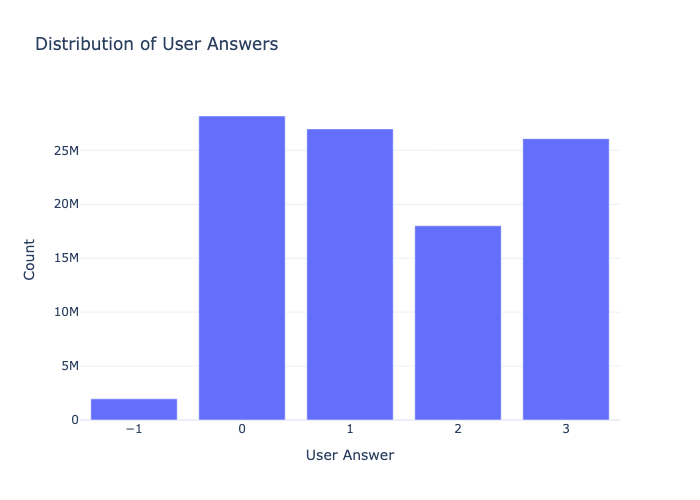

In [56]:
# Groupby 'user_answer' and count the occurrences
user_answer_counts = train['user_answer'].value_counts().reset_index()
user_answer_counts.columns = ['user_answer', 'count']

# Plot the counts of 'user_answer' using Plotly
fig = px.bar(user_answer_counts, x='user_answer', y='count', 
             title='Distribution of User Answers',
             labels={'user_answer': 'User Answer', 'count': 'Count'})
fig.show(plot_format)

In [57]:
! pip install -G kaleido


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -G


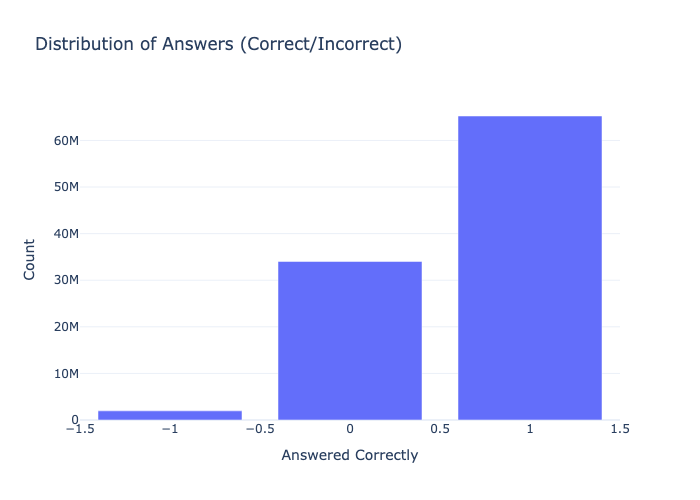

In [58]:
# Groupby 'answered_correctly' and count the occurrences
answered_correctly_counts = train['answered_correctly'].value_counts().reset_index()
answered_correctly_counts.columns = ['answered_correctly', 'count']

# Plot the counts of 'answered_correctly' using Plotly
fig = px.bar(answered_correctly_counts, x='answered_correctly', y='count',
             title='Distribution of Answers (Correct/Incorrect)',
             labels={'answered_correctly': 'Answered Correctly', 'count': 'Count'})
fig.show(plot_format)

In [59]:
# check percentage of unknown 'answered_correctly'
percentage = (train['answered_correctly'] == -1).mean() * 100
print(f"Percentage of rows with unknown answered: {percentage:.2f}%")

Percentage of rows with unknown answered: 1.94%


In [60]:
# Separate content into questions and lectures
questions_train_df = train[train['content_type_id'] == 0]
lectures_train_df = train[train['content_type_id'] == 1]

In [61]:
questions_train_df = pd.merge(
    left=questions_train_df, right=questions, 
    left_on="content_id", right_on="question_id",
)

questions_train_df = questions_train_df.drop(["question_id"], axis=1)

In [62]:
lectures_train_df = pd.merge(
    left=lectures_train_df, right=lectures, 
    left_on="content_id", right_on="lecture_id",
)

lectures_train_df = lectures_train_df.drop(["lecture_id"], axis=1)

Analysis 1: Impact of Prior Explanation on Correct Answer Rate

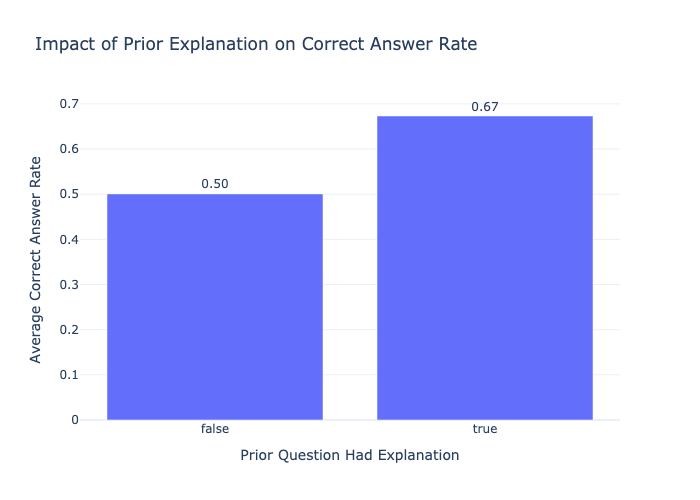

In [63]:
explanation_group = questions_train_df.groupby('prior_question_had_explanation')['answered_correctly'].mean().reset_index()

fig1 = px.bar(
    explanation_group,
    x='prior_question_had_explanation',
    y='answered_correctly',
    title='Impact of Prior Explanation on Correct Answer Rate',
    labels={'prior_question_had_explanation': 'Prior Question Had Explanation', 'answered_correctly': 'Average Correct Answer Rate'},
    text='answered_correctly'
)
fig1.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig1.show(plot_format)

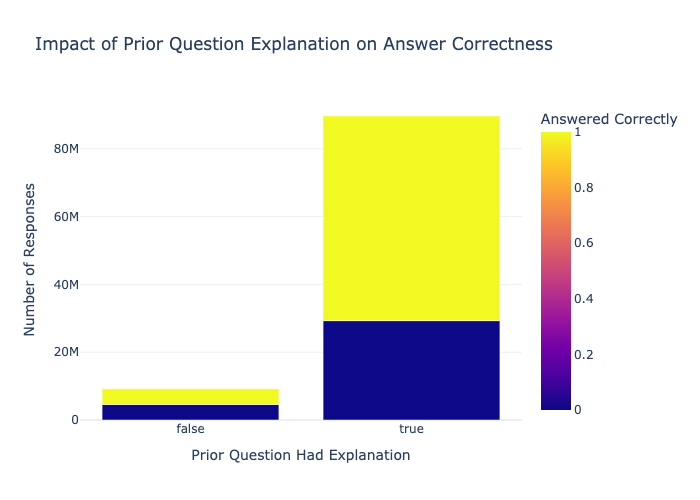

In [64]:
explanation_correct = questions_train_df.groupby(['prior_question_had_explanation', 'answered_correctly']).size().reset_index(name='count')
fig = px.bar(explanation_correct, x='prior_question_had_explanation', y='count', color='answered_correctly',
             title='Impact of Prior Question Explanation on Answer Correctness',
             labels={'prior_question_had_explanation': 'Prior Question Had Explanation', 'count': 'Number of Responses', 'answered_correctly': 'Answered Correctly'})
fig.show(plot_format)

Analysis 2: Average Time Taken vs Correct Answer Rate

/var/folders/tn/pky4_jf56t74wlclcq15d9sc0000gn/T/ipykernel_13607/1047433481.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



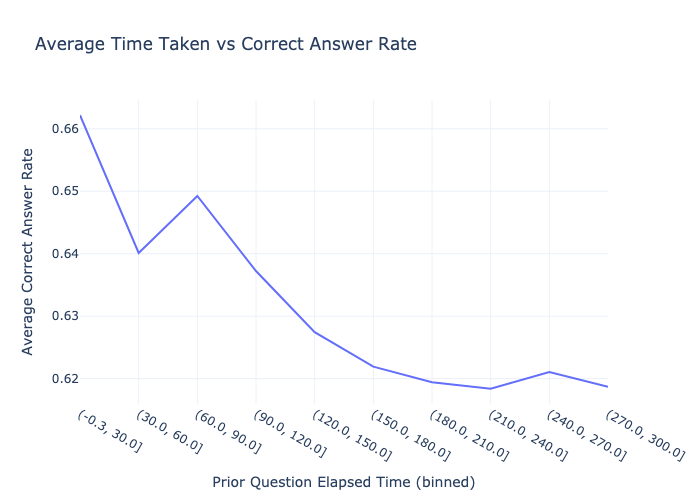

In [65]:
time_correct_group = questions_train_df.groupby(pd.cut(questions_train_df['prior_question_elapsed_time'], bins=10))['answered_correctly'].mean().reset_index()
time_correct_group['prior_question_elapsed_time'] = time_correct_group['prior_question_elapsed_time'].astype(str)

fig2 = px.line(
    time_correct_group,
    x='prior_question_elapsed_time',
    y='answered_correctly',
    title='Average Time Taken vs Correct Answer Rate',
    labels={'prior_question_elapsed_time': 'Prior Question Elapsed Time (binned)', 'answered_correctly': 'Average Correct Answer Rate'}
)
fig2.show(plot_format)

Analysis 3: Correct Answer Rate by Lecture Part

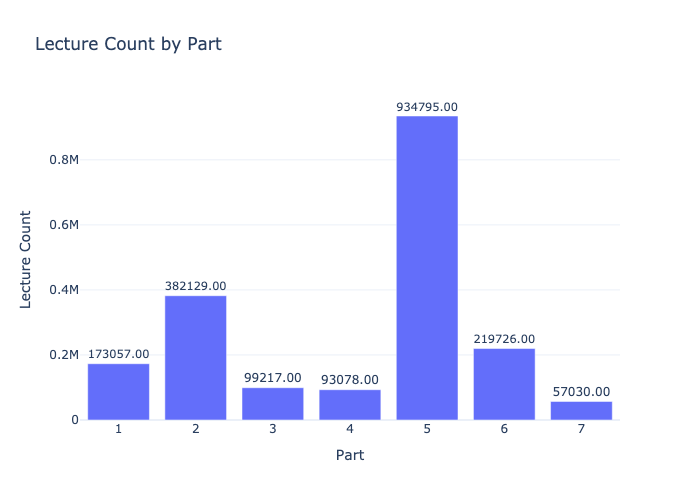

In [66]:
part_lecture_count = lectures_train_df['part'].value_counts().reset_index()
part_lecture_count.columns = ['part', 'lecture_count']

fig3 = px.bar(
    part_lecture_count,
    x='part',
    y='lecture_count',
    title='Lecture Count by Part',
    labels={'part': 'Part', 'lecture_count': 'Lecture Count'},
    text='lecture_count'
)
fig3.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig3.show(plot_format)


Analysis 4: Distribution of User Answers

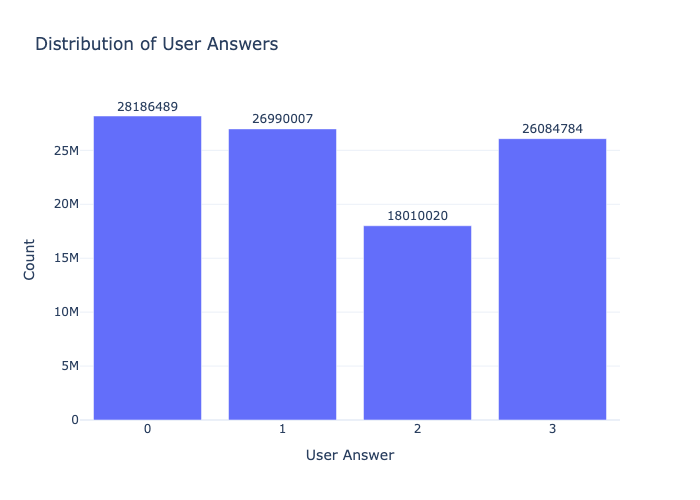

In [67]:
user_answer_dist = questions_train_df['user_answer'].value_counts().reset_index()
user_answer_dist.columns = ['user_answer', 'count']

fig4 = px.bar(
    user_answer_dist,
    x='user_answer',
    y='count',
    title='Distribution of User Answers',
    labels={'user_answer': 'User Answer', 'count': 'Count'},
    text='count'
)
fig4.update_traces(texttemplate='%{text}', textposition='outside')
fig4.show(plot_format)

Analysis 5: Average Correct Answer Rate by Task Container

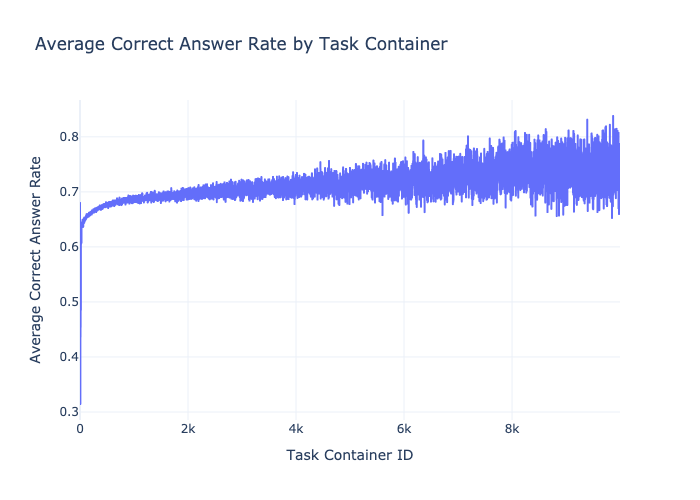

In [68]:
task_container_group = questions_train_df[questions_train_df['answered_correctly'] != -1].groupby('task_container_id')['answered_correctly'].mean().reset_index()

fig5 = px.line(
    task_container_group,
    x='task_container_id',
    y='answered_correctly',
    title='Average Correct Answer Rate by Task Container',
    labels={'task_container_id': 'Task Container ID', 'answered_correctly': 'Average Correct Answer Rate'}
)
fig5.show(plot_format)

Analysis 6: Lecture Types Distribution

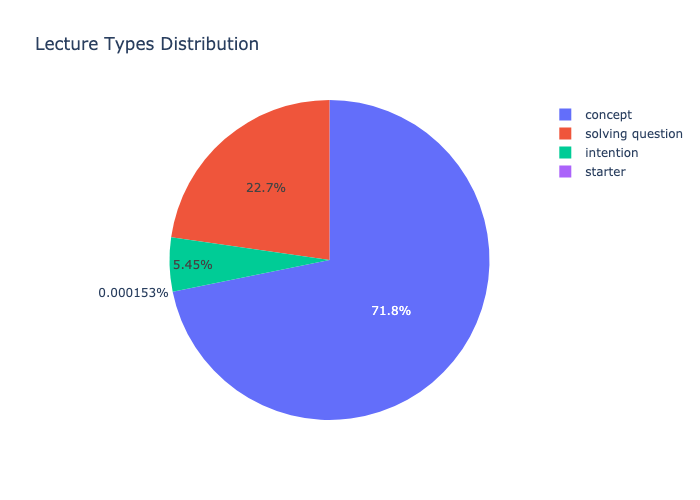

In [69]:
lecture_type_dist = lectures_train_df['type_of'].value_counts().reset_index()
lecture_type_dist.columns = ['type_of', 'count']

fig6 = px.pie(
    lecture_type_dist,
    names='type_of',
    values='count',
    title='Lecture Types Distribution'
)
fig6.show(plot_format)

Analysis 7: Lecture Types

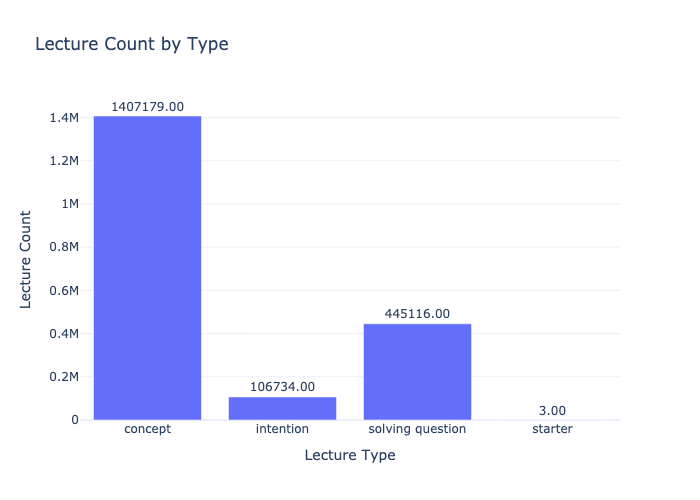

In [70]:
lecture_type_correct = lectures_train_df.groupby('type_of').agg(
    lecture_count=('type_of', 'size'),
    avg_correct_answer_rate=('answered_correctly', 'mean')
).reset_index()
lecture_type_correct.dropna(subset=['avg_correct_answer_rate'], inplace=True)

fig7 = px.bar(
    lecture_type_correct,
    x='type_of',
    y='lecture_count',
    title='Lecture Count by Type',
    labels={'type_of': 'Lecture Type', 'lecture_count': 'Lecture Count'},
    text='lecture_count'
)
fig7.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig7.show(plot_format)

Analysis 8: Correct Answer Rate by User ID

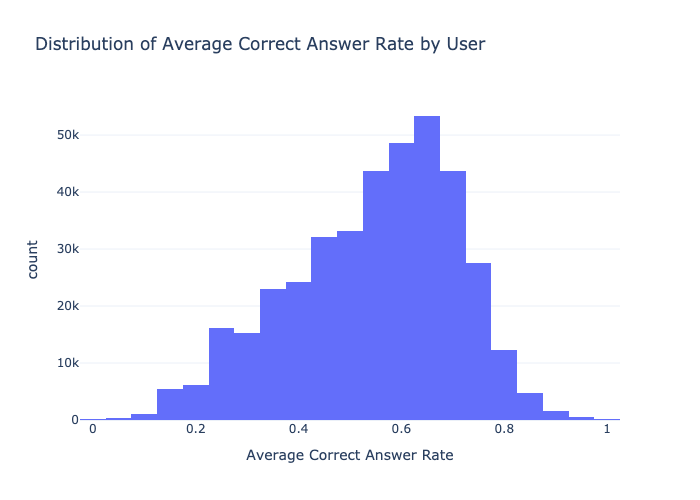

In [71]:
user_correct_group = train[train['answered_correctly'] != -1].groupby('user_id')['answered_correctly'].mean().reset_index()
fig = px.histogram(user_correct_group, x='answered_correctly', nbins=30,
                   title='Distribution of Average Correct Answer Rate by User',
                   labels={'answered_correctly': 'Average Correct Answer Rate', 'count': 'Number of Users'})
fig.show(plot_format)

Analysis 8: Average Elapsed Time by Correct/Incorrect Answers

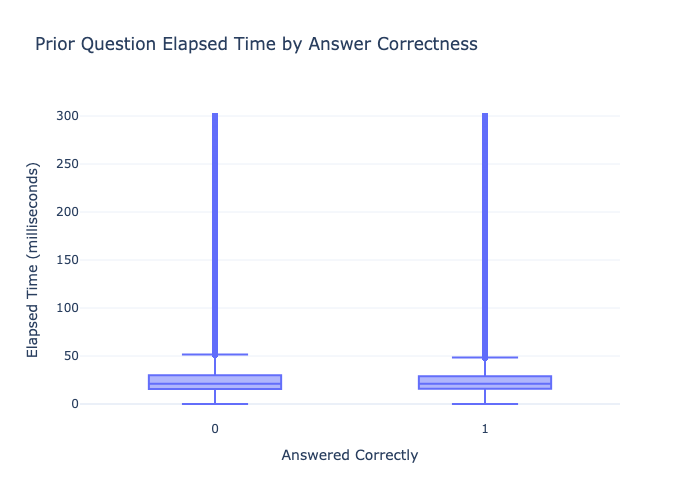

In [72]:

questions_train_df_sample = questions_train_df.sample(frac=0.1, random_state=42)

fig = px.box(questions_train_df_sample, x='answered_correctly', y='prior_question_elapsed_time',
             title='Prior Question Elapsed Time by Answer Correctness',
             labels={'answered_correctly': 'Answered Correctly', 'prior_question_elapsed_time': 'Elapsed Time (milliseconds)'})
fig.show(plot_format)

Analysis 9: Average Elapsed Time by Correct/Incorrect Answers

In [73]:
concatenated_df = pd.concat([questions_train_df, lectures_train_df], axis=0, ignore_index=True)

Analysis 9: Heatmap

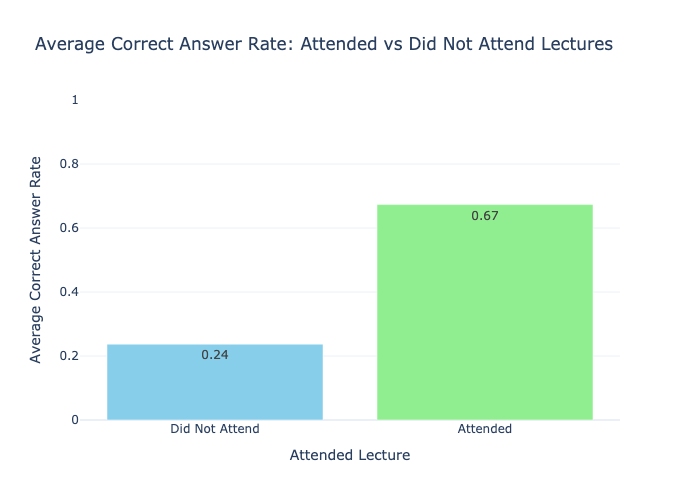

In [74]:
concatenated_df['attended_lecture'] = concatenated_df['prior_question_had_explanation']

# Calculate average correct answer rate for those who attended vs did not attend lectures
avg_correct_rate = concatenated_df.groupby('attended_lecture')['answered_correctly'].mean()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Did Not Attend', 'Attended'],
    y=avg_correct_rate,
    marker=dict(color=['skyblue', 'lightgreen']),
    text=avg_correct_rate.round(2),
    textposition='auto'
))

# Update layout for better visualization
fig.update_layout(
    title='Average Correct Answer Rate: Attended vs Did Not Attend Lectures',
    xaxis_title='Attended Lecture',
    yaxis_title='Average Correct Answer Rate',
    yaxis=dict(range=[0, 1]),
    xaxis_tickangle=0
)

# Show the figure
fig.show(plot_format)

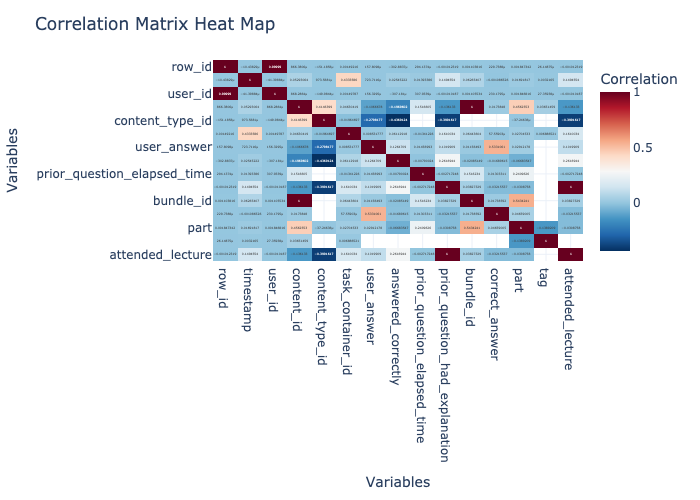

In [75]:
corr = concatenated_df.select_dtypes(exclude=['object']).corr()

# Create heat map
fig = px.imshow(
    corr,
    text_auto=True,
    aspect="auto",
    color_continuous_scale='RdBu_r',
    labels=dict(x="Variables", y="Variables", color="Correlation")
)

fig.update_layout(title='Correlation Matrix Heat Map')
fig.show(plot_format)

Strong Correlations:

- row_id and user_id have an almost perfect positive correlation (0.99999), which may indicate that user IDs are strictly ordered by rows.
- content_id and task_container_id also have a fairly high positive correlation (0.866), which may indicate that groups of questions (task containers) may contain identical elements.

Significant Negative Correlations:

- prior_question_elapsed_time has a moderately negative correlation with answered_correctly (-0.399), suggesting that the more time a user takes to answer a question, the lower the probability of answering correctly.
- content_type_id has a high negative correlation with answered_correctly (-0.396), which could indicate differences in success between different content types, such as lectures and questions.

Insignificant Correlations:

- Most variables have low or insignificant correlations with each other, which may indicate weak linear dependencies between these features.

# Общий вывод по EDA


При проведении разведочного анализа данных (EDA) были выявлены ключевые закономерности и особенности в данных, которые могут повлиять на дальнейшее построение моделей и принятие решений. Основные выводы включают корреляционные зависимости между переменными, распределение значений различных признаков и влияние временных характеристик на правильность ответов пользователей. Анализ показал, что есть признаки с высокой взаимосвязью, а также существуют факторы, негативно влияющие на успешность ответов.

Выводы по каждой визуализации

- Корреляционная матрица (тепловая карта)

Корреляционная матрица показала, что row_id и user_id имеют почти идеальную положительную корреляцию, что может говорить о строгом порядке идентификаторов пользователей по строкам.

Показана отрицательная корреляция между prior_question_elapsed_time и answered_correctly, что означает, что чем больше времени пользователю требуется для ответа на вопрос, тем ниже вероятность правильного ответа.

Также отмечается отрицательная корреляция между content_type_id и answered_correctly, что говорит о различиях в успешности между типами контента (например, лекции и вопросы).

- Среднее время на ответ против правильности ответа

На графике видно, что с увеличением времени на ответ средняя вероятность правильного ответа уменьшается. Это может свидетельствовать о том, что пользователи, которым требуется больше времени на ответ, чаще ошибаются.

- Количество лекций по частям (Lecture Count by Part)

График показывает, что пятая часть содержит наибольшее количество лекций, что может говорить о её особой важности или сложности для пользователей. Наименьшее количество лекций приходится на третью и седьмую части.

- Распределение ответов пользователей (Distribution of User Answers)

Видно, что ответы пользователей распределены неравномерно, причём наибольшее количество ответов приходится на категории 0 и 1. Это может быть связано с типами вопросов или сложностью заданий.

- Средняя правильность ответа по идентификатору задания (Task Container ID)

График показывает рост средней правильности ответа по мере увеличения идентификатора задания. Это может свидетельствовать о том, что пользователи со временем лучше адаптируются и отвечают более правильно.

- Распределение типов лекций (Lecture Types Distribution)

Большая часть лекций посвящена концепциям (71.8%), тогда как лекции по решению вопросов составляют лишь 22.7%. Это говорит о том, что основной акцент сделан на объяснении концепций.

- Количество лекций по типу (Lecture Count by Type)

Тип лекций "concept" преобладает по количеству. Это подтверждает, что основной акцент делается на представление концепций, а не на другие типы лекционного материала.

- Распределение средней правильности ответов пользователей (Average Correct Answer Rate by User)

Гистограмма показывает, что большинство пользователей имеют средний показатель правильности ответов около 0.5-0.6. Это говорит о том, что задания имеют средний уровень сложности для аудитории.

- Среднее время на ответ по правильным/неправильным ответам (Average Elapsed Time by Correct/Incorrect Answers)

Диаграмма показывает, что время на ответ для неправильных и правильных ответов сопоставимо, однако пользователи, ответившие неправильно, в среднем тратили чуть больше времени, что может быть связано с их неуверенностью или сложностью заданий.

